In [1]:
# Logistic Regression on Ames Housing Data
# ==============================

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the dataset
dataset = pd.read_csv('C:\\Users\\ranji\\Documents\\DELL\\Data Analytics & Data Science\\25. 5th July\\Ames_house.csv')
print(dataset.head())
dataset.info()
dataset.describe()
print(dataset.isnull().sum())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [4]:
# Select relevant columns
# (🔹 Replace names below with your actual ones from Step 1)
# Example: 'Gr Liv Area' instead of 'GrLivArea', 'Overall Qual' instead of 'OverallQual'
# ==============================
dataset = dataset[['Gr Liv Area', 'Overall Qual', 'SalePrice']].dropna()

In [5]:
# Create a binary classification target
# 1 = High Price (above median), 0 = Low Price (below median)
median_price = dataset['SalePrice'].median()
dataset['HighPrice'] = (dataset['SalePrice'] > median_price).astype(int)

In [6]:

# Define features (X) and target (y)
X = dataset[['Gr Liv Area', 'Overall Qual']].values
y = dataset['HighPrice'].values

print("\n===== Sample Features =====")
print(X[:5])
print("\n===== Sample Labels =====")
print(y[:5])


===== Sample Features =====
[[1656    6]
 [ 896    5]
 [1329    6]
 [2110    7]
 [1629    5]]

===== Sample Labels =====
[1 0 1 1 1]


In [7]:
# ==============================
# Split into Training and Test sets
# ==============================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training set shape: (2344, 2)
Test set shape: (586, 2)


In [8]:
# Feature Scaling
# ==============================
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Training Logistic Regression
# ==============================
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [10]:
# Predicting a new sample
# Example: House with 2000 sq ft and overall quality 7
sample_pred = classifier.predict(sc.transform([[2000, 7]]))
print("\nPrediction for house (2000 sq ft, Qual=7):", "High Price" if sample_pred[0] == 1 else "Low Price")



Prediction for house (2000 sq ft, Qual=7): High Price


In [11]:
# Predicting Test Set Results
# ==============================
y_pred = classifier.predict(X_test)

comparison = np.concatenate(
    (y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1
)
print("\n===== Predictions vs Actual =====")
print(comparison[:10])



===== Predictions vs Actual =====
[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [12]:
# Confusion Matrix and Accuracy
# ==============================
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("\n===== Confusion Matrix =====")
print(cm)
print("Accuracy:", round(acc * 100, 2), "%")


===== Confusion Matrix =====
[[250  39]
 [ 38 259]]
Accuracy: 86.86 %


C:\Users\ranji\AppData\Local\Temp\ipykernel_29728\103797313.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


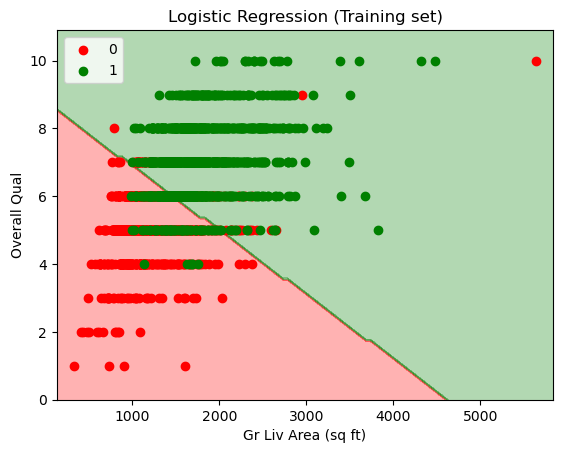

In [13]:
# Visualising the Training set results
# ==============================
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 200, stop=X_set[:, 0].max() + 200, step=50),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.1)
)
plt.contourf(
    X1, X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha=0.3, cmap=ListedColormap(('red', 'green'))
)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )
plt.title('Logistic Regression (Training set)')
plt.xlabel('Gr Liv Area (sq ft)')
plt.ylabel('Overall Qual')
plt.legend()
plt.show()

# ==============================

C:\Users\ranji\AppData\Local\Temp\ipykernel_29728\2546327818.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


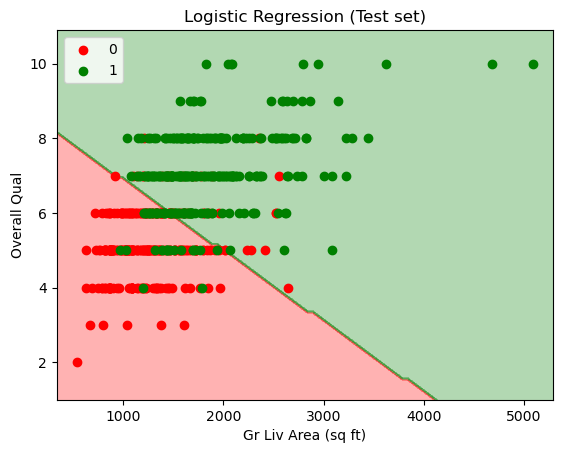

In [14]:
# Visualising the Test set results
# ==============================
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 200, stop=X_set[:, 0].max() + 200, step=50),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.1)
)
plt.contourf(
    X1, X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha=0.3, cmap=ListedColormap(('red', 'green'))
)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )
plt.title('Logistic Regression (Test set)')
plt.xlabel('Gr Liv Area (sq ft)')
plt.ylabel('Overall Qual')
plt.legend()
plt.show()